# 8. 카메라 스티커앱 만들기 첫걸음

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
import math
import cv2

### 사진 준비

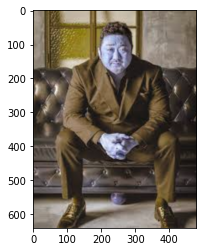

In [11]:
my_image_path = '/content/drive/MyDrive/AIFFEL/EXP/data/camera_sticker/images/Ma_image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_bgr = cv2.resize(img_bgr, (480, 640))
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

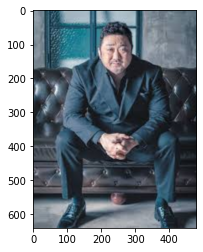

In [12]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 사진검출

In [13]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()

In [14]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(205, 86) (295, 176)]]


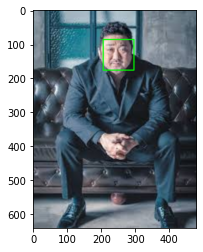

In [15]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 얼굴 랜드마트 Face Landmark

In [16]:
model_path = '/content/drive/MyDrive/AIFFEL/EXP/data/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [17]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
# print(list_landmarks)

68


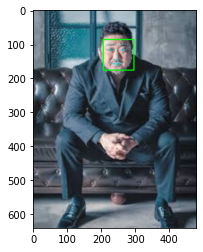

In [18]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 1, (255, 255, 0), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 적용

In [19]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(246, 140)
(x,y) : (246,95)
(w,h) : (91,91)


(91, 91, 3)


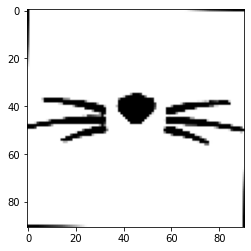

In [20]:
sticker_path = '/content/drive/MyDrive/AIFFEL/EXP/data/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다

rows, cols = img_sticker.shape[:2]
M= cv2.getRotationMatrix2D((cols/2, rows/2), angle = -1, scale = 1)

dst_sticker = cv2.warpAffine(img_sticker, M,(cols, rows))


img_sticker = cv2.resize(dst_sticker, (w,h))

img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)



plt.imshow(img_sticker_rgb)
plt.show
print (img_sticker.shape)

In [23]:
refined_x = x - w//2
refined_y = y - h//24
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (201,92)


In [24]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (201,92)


In [25]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# print(sticker_area)

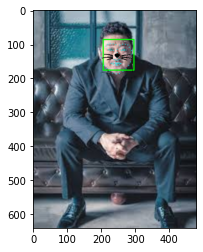

In [26]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

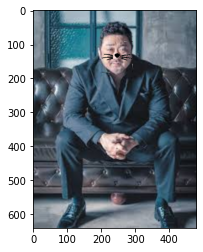

In [27]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

##먼거리 이미지

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
import math
import cv2

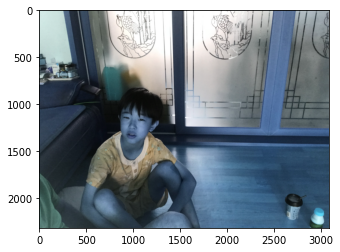

In [81]:
my_image_path = '/content/drive/MyDrive/AIFFEL/EXP/data/camera_sticker/images/MySon.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
# img_bgr = cv2.resize(img_bgr, (480, 640))
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

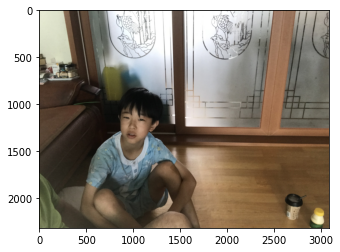

In [82]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [83]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()

In [84]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(847, 1097) (1168, 1418)]]


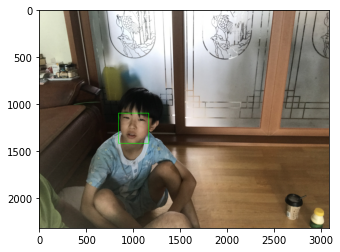

In [87]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 3, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [88]:
model_path = '/content/drive/MyDrive/AIFFEL/EXP/data/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [89]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
# print(list_landmarks)

68


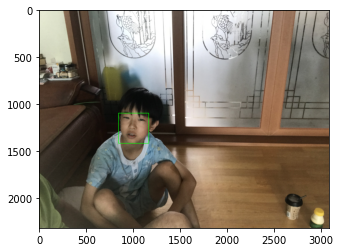

In [90]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 1, (255, 255, 0), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [91]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(988, 1243)
(x,y) : (988,1082)
(w,h) : (322,322)


(322, 322, 3)


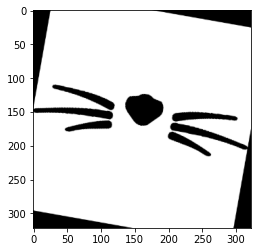

In [92]:
sticker_path = '/content/drive/MyDrive/AIFFEL/EXP/data/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다

rows, cols = img_sticker.shape[:2]
M= cv2.getRotationMatrix2D((cols/2, rows/2), angle = -10, scale = 1)

dst_sticker = cv2.warpAffine(img_sticker, M,(cols, rows))


img_sticker = cv2.resize(dst_sticker, (w,h))

img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)



plt.imshow(img_sticker_rgb)
plt.show
print (img_sticker.shape)

In [93]:
refined_x = x - w//2
refined_y = y - h//24
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (827,1069)


In [94]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (827,1069)


In [95]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# print(sticker_area)

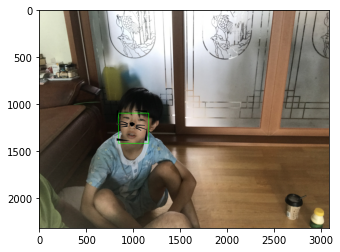

In [96]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

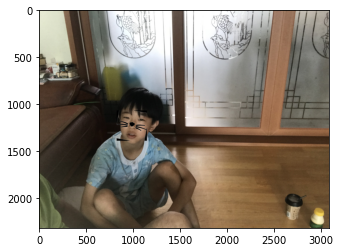

In [97]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 여러명일 경우

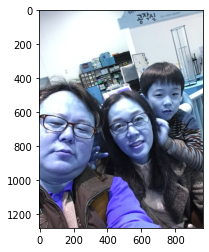

In [6]:
my_image_path = '/content/drive/MyDrive/AIFFEL/EXP/data/camera_sticker/images/myFamily.JPG'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
# img_bgr = cv2.resize(img_bgr, (480, 640))
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

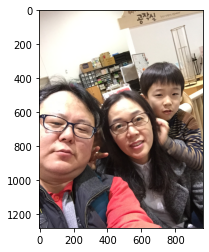

In [7]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [8]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()

In [9]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(409, 587) (676, 855)], [(637, 440) (860, 663)], [(-53, 547) (375, 932)]]


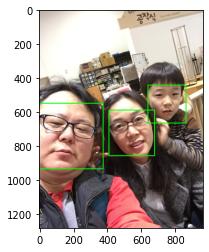

In [10]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 3, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [11]:
model_path = '/content/drive/MyDrive/AIFFEL/EXP/data/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [12]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
# print(list_landmarks)

68


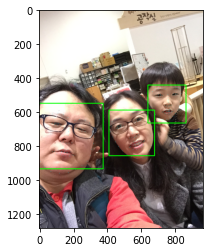

In [13]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 1, (255, 255, 0), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [14]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(547, 724)
(x,y) : (547,590)
(w,h) : (268,268)
(758, 543)
(x,y) : (758,431)
(w,h) : (224,224)
(170, 736)
(x,y) : (170,543)
(w,h) : (429,429)


(429, 429, 3)


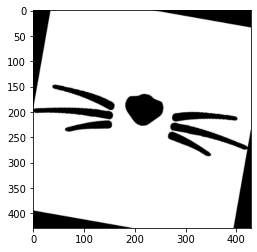

In [15]:
sticker_path = '/content/drive/MyDrive/AIFFEL/EXP/data/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다

rows, cols = img_sticker.shape[:2]
M= cv2.getRotationMatrix2D((cols/2, rows/2), angle = -10, scale = 1)

dst_sticker = cv2.warpAffine(img_sticker, M,(cols, rows))


img_sticker = cv2.resize(dst_sticker, (w,h))

img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)



plt.imshow(img_sticker_rgb)
plt.show
print (img_sticker.shape)

In [16]:
refined_x = x - w//2
refined_y = y - h//24
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (-44,526)


In [17]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (0,526)


In [18]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# print(sticker_area)

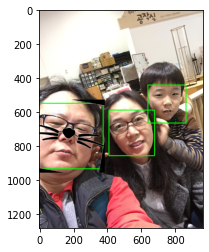

In [19]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

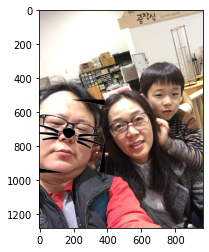

In [115]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

회고

1. 얼굴이 크게 나온 사진, 얼굴이 멀리 있는 사진 그리고 여러명이 있는 사진을 해보았더니 detector가 잘 되는 것을 알 수 있었다.
2. detector 되는 부분이 얼굴을 균형있게 잡아 주지는 못하고 약간씩 한 쪽으로 쏠러 있는 것을 알 수 있었다. 
3. 코수염을 각도 조절을 getRotationMatrix와 warfAffine함수를 사용하여 조절은 가능하였지만 detector를 통해 조절이 필요할 것 같다.
4. 코수염을 회전였더니 배경만 희색부분이었지만 회전하여 생긴 부분이 검은 부분으로 되었다.
5.검출할 때 얼굴이 모양에 따라 각도 조절이 되었으면 좋을 것 같다. 지금 조사를 못하였지만 찾아봐야 할 것 같다. 